In [5]:
# ML ko sabai algorithm scikit-learn ma vetinxa

import pandas as pd
df = pd.read_csv('pandaCSV/email.csv')
print(df.head())
print('........................................')
print(df.tail())


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
........................................
            Category                                            Message
5568             ham               Will ü b going to esplanade fr home?
5569             ham  Pity, * was in mood for that. So...any other s...
5570             ham  The guy did some bitching but I acted like i'd...
5571             ham                         Rofl. Its true to its name
5572  {"mode":"full"                                    isActive:false}


In [6]:
print(df.describe())

       Category                 Message
count      5573                    5573
unique        3                    5158
top         ham  Sorry, I'll call later
freq       4825                      30


In [6]:
print(df.shape)

(5573, 2)


In [7]:
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [8]:
# category bhako data like this above data lai supervised learning ko algorithm dinuparcha

df.dropna(inplace=True,axis=0) #axis=0 means row which is default value 

# inplacr=True means yehi dataset ma null remove garnu,
# if inplace = true nagarey, data ko copy banayera null remove garera save garcha

print(df)

            Category                                            Message
0                ham  Go until jurong point, crazy.. Available only ...
1                ham                      Ok lar... Joking wif u oni...
2               spam  Free entry in 2 a wkly comp to win FA Cup fina...
3                ham  U dun say so early hor... U c already then say...
4                ham  Nah I don't think he goes to usf, he lives aro...
...              ...                                                ...
5568             ham               Will ü b going to esplanade fr home?
5569             ham  Pity, * was in mood for that. So...any other s...
5570             ham  The guy did some bitching but I acted like i'd...
5571             ham                         Rofl. Its true to its name
5572  {"mode":"full"                                    isActive:false}

[5573 rows x 2 columns]


In [9]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [10]:
# get distinct(unique) values from 'category' column
import pandas as pd
distinct_values=df['Category'].unique()
print(distinct_values)

['ham' 'spam' '{"mode":"full"']


In [31]:
distinct_counts=df.groupby('Category')['Message'].nunique()
# print(distinct_counts)
distinct_counts

Category
ham               4516
spam               641
{"mode":"full"       1
Name: Message, dtype: int64

In [43]:
import matplotlib.pyplot as plt


distinct_category=distinct_counts.index.tolist()
message_count = distinct_counts.values.tolist()
message_count

[4516, 641, 1]

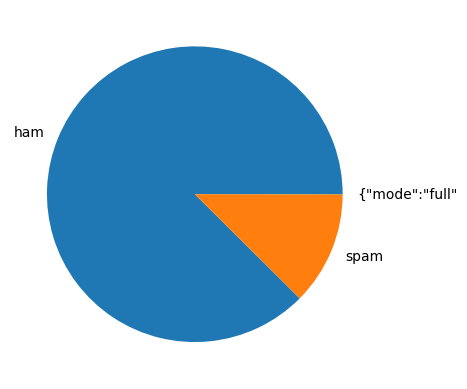

In [44]:

fig, ax = plt.subplots()
ax.pie(message_count, labels=distinct_category)
plt.show()

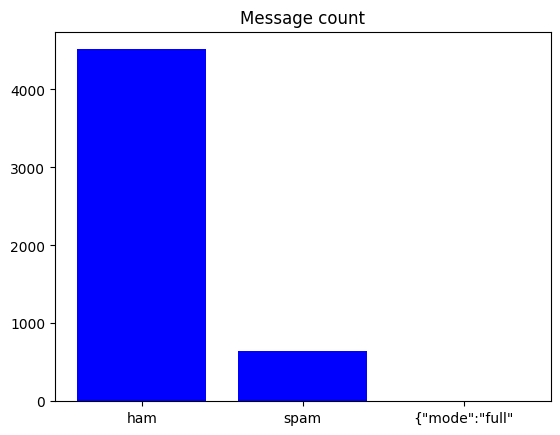

In [47]:
# bargraph

plt.bar(distinct_category,message_count,color="blue")

plt.title('Message count')


plt.show()

In [48]:
x=df['Message']
y=df['Category']
print(y)

0                  ham
1                  ham
2                 spam
3                  ham
4                  ham
             ...      
5568               ham
5569               ham
5570               ham
5571               ham
5572    {"mode":"full"
Name: Category, Length: 5573, dtype: object


In [58]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
x_train

3367                      I am waiting for your call sir.
4832               Po de :-):):-):-):-). No need job aha.
1160    Yun buying... But school got offer 2000 plus o...
2097                                          I'm done...
585     So how's scotland. Hope you are not over showi...
                              ...                        
4473      3. You have received your mobile content. Enjoy
580     Arngd marriage is while u r walkin unfortuntly...
163     I'm so in love with you. I'm excited each day ...
4703                                           Anytime...
3616    I enjoy watching and playing football and bask...
Name: Message, Length: 4458, dtype: object

In [55]:
x_test

3466    Haha figures, well I found the piece and prisc...
5193                It's wylie, you in tampa or sarasota?
2542      I dont. Can you send it to me. Plus how's mode.
3598    Congratulations YOU'VE Won. You're a Winner in...
5005    There's someone here that has a year  &lt;#&gt...
                              ...                        
3962                              Your dad is back in ph?
2608    :-) yeah! Lol. Luckily i didn't have a starrin...
741                Yes i will be there. Glad you made it.
5527    Total disappointment, when I texted you was th...
1822    I couldn't say no as he is a dying man and I f...
Name: Message, Length: 1115, dtype: object

In [56]:
y_train

3367     ham
4832     ham
1160     ham
2097     ham
585      ham
        ... 
4473    spam
580      ham
163      ham
4703     ham
3616     ham
Name: Category, Length: 4458, dtype: object

In [57]:
y_test

3466     ham
5193     ham
2542     ham
3598    spam
5005     ham
        ... 
3962     ham
2608     ham
741      ham
5527     ham
1822     ham
Name: Category, Length: 1115, dtype: object

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=1500)
x_train_cv = cv.fit_transform(x_train)
x_train_cv.shape
x_test_cv=cv.transform(x_test)

In [79]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train_cv,y_train)
y_predict=clf.predict(x_test_cv)
print(y_predict)
# print(y_test)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


[Text(0.5, 0.875, 'x[227] <= 0.101\ngini = 0.231\nsamples = 4458\nvalue = [3864, 593, 1]'),
 Text(0.25, 0.625, 'x[1328] <= 0.06\ngini = 0.154\nsamples = 4030\nvalue = [3691, 338, 1]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1472] <= 0.071\ngini = 0.108\nsamples = 3905\nvalue = [3681.0, 223.0, 1.0]'),
 Text(0.0625, 0.125, 'gini = 0.091\nsamples = 3864\nvalue = [3679, 184, 1]'),
 Text(0.1875, 0.125, 'gini = 0.093\nsamples = 41\nvalue = [2, 39, 0]'),
 Text(0.375, 0.375, 'x[1287] <= 0.029\ngini = 0.147\nsamples = 125\nvalue = [10, 115, 0]'),
 Text(0.3125, 0.125, 'gini = 0.497\nsamples = 13\nvalue = [7, 6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.052\nsamples = 112\nvalue = [3, 109, 0]'),
 Text(0.75, 0.625, 'x[227] <= 0.173\ngini = 0.482\nsamples = 428\nvalue = [173.0, 255.0, 0.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[777] <= 0.049\ngini = 0.263\nsamples = 250\nvalue = [39, 211, 0]'),
 Text(0.5625, 0.125, 'gini = 0.153\nsamples = 227\nvalue = [19, 208, 0]'),
 Te

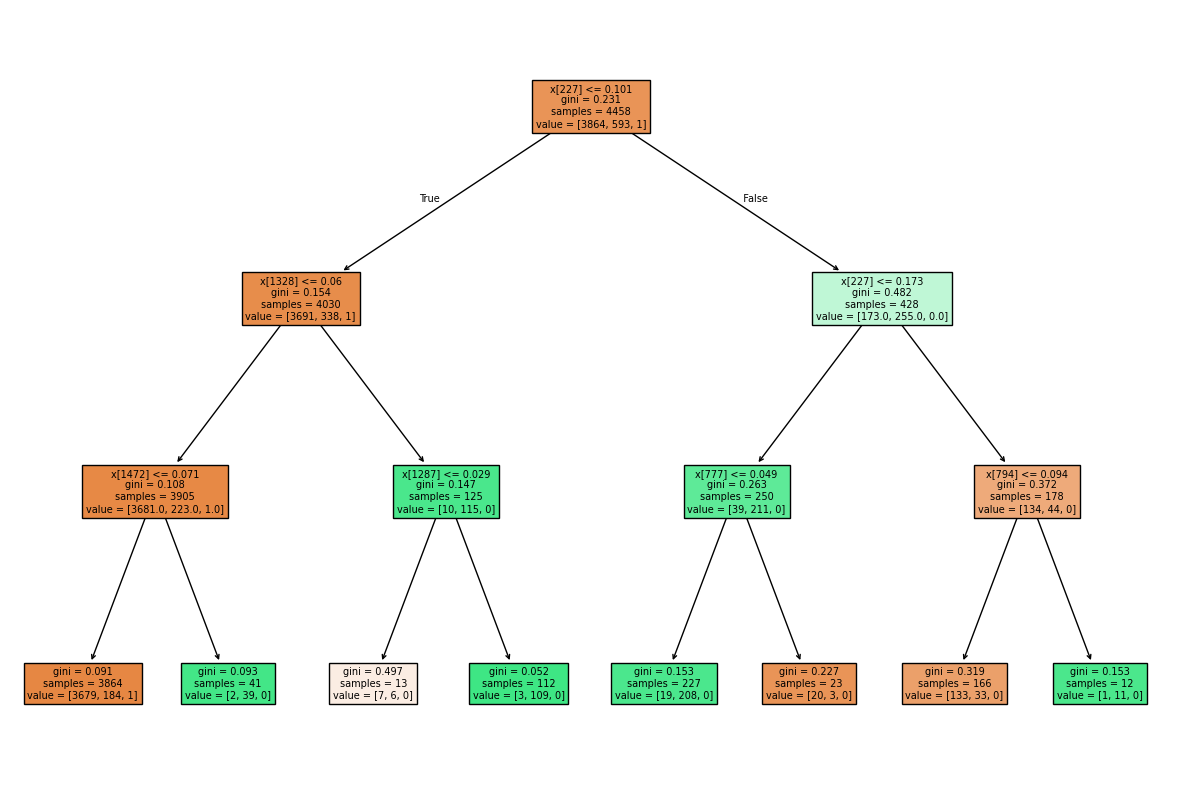

In [74]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       961
        spam       0.98      0.61      0.75       154

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115

